Do featured Wikipedia articles have a higher proportion of pages with at least one reference than non featured articles?

  Group  Uses_TikTok
0  Teen            1
1  Teen            0
2  Teen            1
3  Teen            1
4  Teen            1
5  Teen            1
6  Teen            1
7  Teen            0
8  Teen            1
9  Teen            1

Total sample size: 550

Summary Statistics:
       Uses_TikTok  Sample_Size  Proportion
Group                                      
Adult          148          300    0.493333
Teen           187          250    0.748000

Sample proportion for Adults (p̂₁): 0.4933
Sample proportion for Teens (p̂₂): 0.7480
Difference (p̂₁ - p̂₂): -0.2547


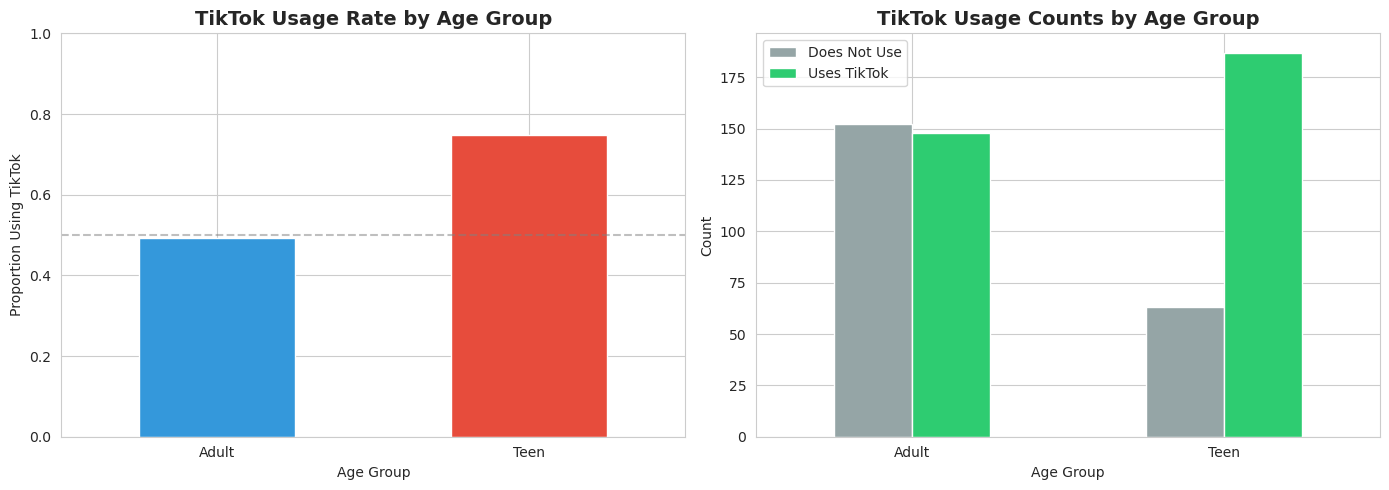

🔍 CONDITION CHECKS FOR CONFIDENCE INTERVAL


1. RANDOM CONDITION:
   ✓ We assume both samples were randomly selected.
   (In practice, you'd verify this from the study design)

2. INDEPENDENCE CONDITION (10% Rule):
   ✓ Adult sample (300) < 10% of all adults in population
   ✓ Teen sample (250) < 10% of all teens in population
   ✓ The two groups are independent (different people)

3. NORMAL/LARGE COUNTS CONDITION:
   We need at least 10 successes AND 10 failures in EACH group:

   Adults:
   • Successes (uses TikTok): 148 ✓
   • Failures (doesn't use): 152 ✓

   Teens:
   • Successes (uses TikTok): 187 ✓
   • Failures (doesn't use): 63 ✓


✅ ALL CONDITIONS ARE SATISFIED!
We can proceed with constructing a confidence interval.

📊 STEP-BY-STEP CALCULATION


Step 1: Calculate sample proportions
   p̂₁ (Adults) = 148/300 = 0.4933
   p̂₂ (Teens)  = 187/250 = 0.7480

Step 2: Calculate point estimate (difference)
   p̂₁ - p̂₂ = 0.4933 - 0.7480 = -0.2547

Step 3: Calculate standard error
   S

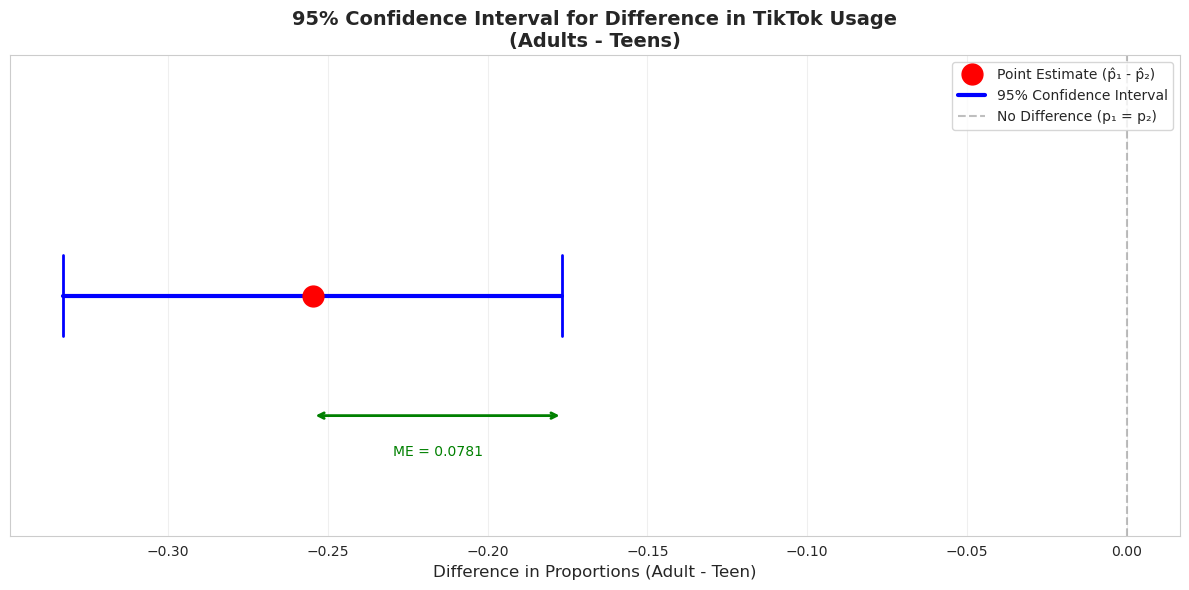


🎯 The confidence interval is entirely below zero.
   This suggests adults use TikTok at a LOWER rate than teens.

📝 INTERPRETATION


We are 95% confident that the true difference in the
proportion of adults who use TikTok and the proportion of teens who
use TikTok is between -0.3328 and -0.1766.

In other words, we are 95% confident that the adult TikTok
usage rate is between 33.28 and 17.66 percentage points
LOWER than the teen TikTok usage rate.


🔑 KEY UNDERSTANDING:

This means that if we repeated this study many times with different
random samples, about 95% of the confidence intervals we
calculate would contain the true difference in population proportions.

⚖️ JUSTIFYING A CLAIM


Claim: Adults and teens use TikTok at different rates.

Evidence from our analysis:

1. Our 95% confidence interval is (-0.3328, -0.1766)

2. The ENTIRE interval is BELOW zero.
   ✅ This means we have strong evidence that adults use TikTok
      at a LOWER rate than teens.

3. The margin of error is 7

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # This library is great at performing certain statistical calculations

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Set random seed for reproducibility
np.random.seed(42)

# Sample sizes
n_teens = 250
n_adults = 300

# Generate data: 1 = uses TikTok, 0 = doesn't use TikTok
# Teens have about 75% usage rate
teens_data = np.random.binomial(1, 0.75, n_teens)
# Adults have about 45% usage rate
adults_data = np.random.binomial(1, 0.45, n_adults)

# Create a DataFrame
data = pd.DataFrame({
    'Group': ['Teen'] * n_teens + ['Adult'] * n_adults,
    'Uses_TikTok': np.concatenate([teens_data, adults_data])
})

print(data.head(10))
print(f"\nTotal sample size: {len(data)}")

# Calculate sample proportions
summary = data.groupby('Group')['Uses_TikTok'].agg(['sum', 'count', 'mean'])
summary.columns = ['Uses_TikTok', 'Sample_Size', 'Proportion']
print("\nSummary Statistics:")
print(summary)
print(f"\nSample proportion for Adults (p̂₁): {summary.loc['Adult', 'Proportion']:.4f}")
print(f"Sample proportion for Teens (p̂₂): {summary.loc['Teen', 'Proportion']:.4f}")
print(f"Difference (p̂₁ - p̂₂): {summary.loc['Adult', 'Proportion'] - summary.loc['Teen', 'Proportion']:.4f}")

# Visualize the data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart showing proportions
summary['Proportion'].plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('TikTok Usage Rate by Age Group', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Proportion Using TikTok')
axes[0].set_xlabel('Age Group')
axes[0].set_ylim([0, 1])
axes[0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Count plot showing actual counts
count_data = data.groupby(['Group', 'Uses_TikTok']).size().unstack(fill_value=0)
count_data.plot(kind='bar', stacked=False, ax=axes[1], color=['#95a5a6', '#2ecc71'])
axes[1].set_title('TikTok Usage Counts by Age Group', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Age Group')
axes[1].legend(['Does Not Use', 'Uses TikTok'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Extract values
n1 = summary.loc['Adult', 'Sample_Size']
n2 = summary.loc['Teen', 'Sample_Size']
p1_hat = summary.loc['Adult', 'Proportion']
p2_hat = summary.loc['Teen', 'Proportion']
x1 = summary.loc['Adult', 'Uses_TikTok']
x2 = summary.loc['Teen', 'Uses_TikTok']

print("🔍 CONDITION CHECKS FOR CONFIDENCE INTERVAL\n")
print("="*60)

# Random condition
print("\n1. RANDOM CONDITION:")
print("   ✓ We assume both samples were randomly selected.")
print("   (In practice, you'd verify this from the study design)")

# Independence condition
print("\n2. INDEPENDENCE CONDITION (10% Rule):")
print(f"   ✓ Adult sample ({n1}) < 10% of all adults in population")
print(f"   ✓ Teen sample ({n2}) < 10% of all teens in population")
print("   ✓ The two groups are independent (different people)")

# Normal/Large Counts condition
print("\n3. NORMAL/LARGE COUNTS CONDITION:")
print("   We need at least 10 successes AND 10 failures in EACH group:\n")

# Adults
adult_successes = x1
adult_failures = n1 - x1
print(f"   Adults:")
print(f"   • Successes (uses TikTok): {adult_successes:.0f} {'✓' if adult_successes >= 10 else '✗'}")
print(f"   • Failures (doesn't use): {adult_failures:.0f} {'✓' if adult_failures >= 10 else '✗'}")

# Teens
teen_successes = x2
teen_failures = n2 - x2
print(f"\n   Teens:")
print(f"   • Successes (uses TikTok): {teen_successes:.0f} {'✓' if teen_successes >= 10 else '✗'}")
print(f"   • Failures (doesn't use): {teen_failures:.0f} {'✓' if teen_failures >= 10 else '✗'}")

# Overall check
all_conditions_met = (adult_successes >= 10 and adult_failures >= 10 and 
                      teen_successes >= 10 and teen_failures >= 10)

print("\n" + "="*60)
if all_conditions_met:
    print("\n✅ ALL CONDITIONS ARE SATISFIED!")
    print("We can proceed with constructing a confidence interval.")
else:
    print("\n❌ NOT ALL CONDITIONS ARE SATISFIED!")
    print("We should NOT construct a confidence interval.")


def calculate_two_proportion_ci(n1, x1, n2, x2, confidence_level=0.95):
    """
    Calculate confidence interval for difference in two proportions.
    """
    p1_hat = x1 / n1
    p2_hat = x2 / n2
    point_estimate = p1_hat - p2_hat
    se = np.sqrt((p1_hat * (1 - p1_hat) / n1) + (p2_hat * (1 - p2_hat) / n2))
    alpha = 1 - confidence_level
    z_star = stats.norm.ppf(1 - alpha/2)
    margin_of_error = z_star * se
    ci_lower = point_estimate - margin_of_error
    ci_upper = point_estimate + margin_of_error
    
    return {
        'p1_hat': p1_hat,
        'p2_hat': p2_hat,
        'point_estimate': point_estimate,
        'standard_error': se,
        'z_star': z_star,
        'margin_of_error': margin_of_error,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'confidence_level': confidence_level
    }

# Calculate 95% confidence interval
results = calculate_two_proportion_ci(n1, x1, n2, x2, confidence_level=0.95)

print("\n📊 STEP-BY-STEP CALCULATION\n")
print("="*70)
print(f"\nStep 1: Calculate sample proportions")
print(f"   p̂₁ (Adults) = {x1}/{n1} = {results['p1_hat']:.4f}")
print(f"   p̂₂ (Teens)  = {x2}/{n2} = {results['p2_hat']:.4f}")

print(f"\nStep 2: Calculate point estimate (difference)")
print(f"   p̂₁ - p̂₂ = {results['p1_hat']:.4f} - {results['p2_hat']:.4f} = {results['point_estimate']:.4f}")

print(f"\nStep 3: Calculate standard error")
print(f"   SE = √[(p̂₁(1-p̂₁)/n₁) + (p̂₂(1-p̂₂)/n₂)]")
print(f"   SE = √[({results['p1_hat']:.4f})({1-results['p1_hat']:.4f})/{n1} + ({results['p2_hat']:.4f})({1-results['p2_hat']:.4f})/{n2}]")
print(f"   SE = {results['standard_error']:.4f}")

print(f"\nStep 4: Find critical value for {results['confidence_level']*100:.0f}% confidence")
print(f"   z* = {results['z_star']:.4f}")

print(f"\nStep 5: Calculate margin of error")
print(f"   ME = z* × SE = {results['z_star']:.4f} × {results['standard_error']:.4f} = {results['margin_of_error']:.4f}")
print(f"   ME = {results['margin_of_error']*100:.2f} percentage points")

print(f"\nStep 6: Calculate confidence interval")
print(f"   CI = (p̂₁ - p̂₂) ± ME")
print(f"   CI = {results['point_estimate']:.4f} ± {results['margin_of_error']:.4f}")
print(f"   CI = ({results['ci_lower']:.4f}, {results['ci_upper']:.4f})")
print(f"   CI = ({results['ci_lower']*100:.2f}%, {results['ci_upper']*100:.2f}%)")

print("\n" + "="*70)

# Visualize the confidence interval
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the point estimate
ax.plot(results['point_estimate'], 0, 'ro', markersize=15, label='Point Estimate (p̂₁ - p̂₂)', zorder=3)

# Plot the confidence interval
ax.plot([results['ci_lower'], results['ci_upper']], [0, 0], 'b-', linewidth=3, label=f"{results['confidence_level']*100:.0f}% Confidence Interval")
ax.plot([results['ci_lower'], results['ci_lower']], [-0.05, 0.05], 'b-', linewidth=2)
ax.plot([results['ci_upper'], results['ci_upper']], [-0.05, 0.05], 'b-', linewidth=2)

# Add margin of error annotation
ax.annotate('', xy=(results['point_estimate'] + results['margin_of_error'], -0.15), 
            xytext=(results['point_estimate'], -0.15),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(results['point_estimate'] + results['margin_of_error']/2, -0.2, 
        f'ME = {results["margin_of_error"]:.4f}', ha='center', fontsize=10, color='green')

# Add vertical line at zero
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, label='No Difference (p₁ = p₂)')

# Formatting
ax.set_ylim([-0.3, 0.3])
ax.set_xlabel('Difference in Proportions (Adult - Teen)', fontsize=12)
ax.set_title(f'{results["confidence_level"]*100:.0f}% Confidence Interval for Difference in TikTok Usage\n(Adults - Teens)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.set_yticks([])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 The confidence interval is entirely {'below' if results['ci_upper'] < 0 else 'above' if results['ci_lower'] > 0 else 'around'} zero.")
if results['ci_upper'] < 0:
    print("   This suggests adults use TikTok at a LOWER rate than teens.")
elif results['ci_lower'] > 0:
    print("   This suggests adults use TikTok at a HIGHER rate than teens.")
else:
    print("   This suggests there might not be a significant difference.")

print("\n📝 INTERPRETATION\n")
print("="*70)
print(f"\nWe are {results['confidence_level']*100:.0f}% confident that the true difference in the")
print(f"proportion of adults who use TikTok and the proportion of teens who")
print(f"use TikTok is between {results['ci_lower']:.4f} and {results['ci_upper']:.4f}.")
print(f"\nIn other words, we are {results['confidence_level']*100:.0f}% confident that the adult TikTok")
print(f"usage rate is between {abs(results['ci_lower'])*100:.2f} and {abs(results['ci_upper'])*100:.2f} percentage points")
print(f"LOWER than the teen TikTok usage rate.")
print("\n" + "="*70)

print("\n🔑 KEY UNDERSTANDING:")
print("\nThis means that if we repeated this study many times with different")
print(f"random samples, about {results['confidence_level']*100:.0f}% of the confidence intervals we")
print("calculate would contain the true difference in population proportions.")

print("\n⚖️ JUSTIFYING A CLAIM\n")
print("="*70)
print("\nClaim: Adults and teens use TikTok at different rates.\n")

print("Evidence from our analysis:")
print(f"\n1. Our {results['confidence_level']*100:.0f}% confidence interval is ({results['ci_lower']:.4f}, {results['ci_upper']:.4f})")

if results['ci_lower'] > 0:
    print("\n2. The ENTIRE interval is ABOVE zero.")
    print("   ✅ This means we have strong evidence that adults use TikTok")
    print("      at a HIGHER rate than teens.")
elif results['ci_upper'] < 0:
    print("\n2. The ENTIRE interval is BELOW zero.")
    print("   ✅ This means we have strong evidence that adults use TikTok")
    print("      at a LOWER rate than teens.")
else:
    print("\n2. The interval CONTAINS zero.")
    print("   ❌ This means we do NOT have strong evidence of a difference.")
    print("      The observed difference could be due to random chance.")

print(f"\n3. The margin of error is {results['margin_of_error']*100:.2f} percentage points,")
print(f"   which is relatively small compared to the difference of")
print(f"   {abs(results['point_estimate'])*100:.2f} percentage points.")

print("\n" + "="*70)
print("\n🏁 CONCLUSION:")
if results['ci_lower'] > 0 or results['ci_upper'] < 0:
    print("\nWe have convincing statistical evidence to support the claim that")
    print("adults and teens use TikTok at different rates. The difference is")
    print("unlikely to be due to random chance alone.")
else:
    print("\nWe do NOT have convincing statistical evidence to support the claim.")
    print("The observed difference could reasonably be due to random chance.")
